In [52]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
FOLDER = '..\data'
FN = 'restocracy_all_data.pkl'

In [3]:
with open(os.path.join(FOLDER, FN), 'rb') as fh:
    data = pickle.load(fh)

In [4]:
type(data)

list

In [5]:
len(data)

200

In [6]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [7]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [8]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [9]:
reviews[0][:100]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis l'

In [10]:
np_prices = np.array([int(x.split(' ')[0]) for x in prices])
np_prices

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288, 266, 229, 133,
       214, 109, 219, 147, 200, 170, 360, 258, 232, 133, 168, 206, 232,
       133, 168, 206, 138, 138, 106, 181, 208, 120, 133, 186, 126, 149,
        82, 130, 189, 114, 208, 184, 226, 118, 130, 155, 141, 128, 141,
       387, 104, 106, 154, 155, 246, 154, 128, 102, 109, 114, 162, 194,
       309, 176, 162, 224, 126, 104,  64, 114, 117, 130, 130, 149,  82,
       107, 229, 253,  91, 187,  91, 251, 131, 142, 114, 138, 115, 109,
       130, 115, 259, 115,  90, 136, 122, 150, 144, 131, 138, 158, 114,
       117, 114, 110, 131, 162, 106, 218, 101, 109, 144, 134, 149, 138,
       130, 101, 115, 133,  96, 165, 120,  70,  88,  98, 101, 149,  94,
       226, 163, 115,  94,  91,  82, 117,  99, 122, 163,  67, 123, 149,
       134, 142,  96, 224,  96, 168, 136, 146, 128,  94, 126, 170, 139,
       109, 123, 107, 115, 128, 104, 146, 197, 122, 150, 128, 106, 130,
       131, 131,  85, 122, 117,  83,  86, 123, 109, 112, 112, 13

In [11]:
np_prices.shape

(200,)

(array([ 3., 11., 16., 37., 26., 32., 16., 11.,  8.,  9.,  6.,  5.,  6.,
         2.,  4.,  4.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 64.  ,  76.92,  89.84, 102.76, 115.68, 128.6 , 141.52, 154.44,
        167.36, 180.28, 193.2 , 206.12, 219.04, 231.96, 244.88, 257.8 ,
        270.72, 283.64, 296.56, 309.48, 322.4 , 335.32, 348.24, 361.16,
        374.08, 387.  ]),
 <BarContainer object of 25 artists>)

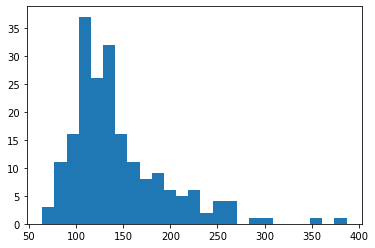

In [13]:
plt.hist(np_prices, bins=25)

In [14]:
reviews[0].split()[:5]

['Noul', 'restaurant', 'vedeta', 'al', 'Bucurestiului,']

In [15]:
def get_vocabulary(all_docs):
    dct_occurences = {}
    for doc in all_docs:
        words_in_doc = doc.split()
        for word in words_in_doc:
            if word in dct_occurences:
                dct_occurences[word] += 1
            else:
                dct_occurences[word] = 1
    lst_occ = sorted([(w, occ) for w, occ in dct_occurences.items()], key=lambda x: x[1], reverse=True)
    dct_word_to_index = {w[0]:idx+1 for idx, w in enumerate(lst_occ)}
    dct_word_to_index['UNK'] = 0
    dct_index_to_word = {i:w for w,i in dct_word_to_index.items()}
    return lst_occ, dct_word_to_index, dct_index_to_word
    

In [16]:
o, w2i, i2w = get_vocabulary(reviews)

In [17]:
o[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [18]:
i2w[1]

'de'

In [19]:
i2w[0]

'UNK'

In [20]:
w2i['restaurant']

26

In [33]:
def review_to_tokens(review, dct_w2i, unk_word_idx=0, max_words=1000):
    obs_tokens = []
    for word in review.split():
        obs_tokens.append(dct_w2i.get(word, unk_word_idx))
    diff = max(0, max_words - len(obs_tokens))
    obs_tokens = obs_tokens + [0] * diff
    obs_tokens = obs_tokens[:max_words]
    return obs_tokens

def tokens_to_review(tokens, dct_i2w):
    return " ".join([dct_i2w[t] for t in tokens])

In [22]:
o1 = review_to_tokens(reviews[0], dct_w2i=w2i)
o1[:10]

[2181, 26, 2751, 37, 244, 15, 1377, 4219, 1, 2420]

In [23]:
tokens_to_review(o1, i2w)

'Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte frumoasa 

In [24]:
np_prices[:10]

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288])

In [26]:
lst_obs = [review_to_tokens(x, w2i) for x in reviews]

(array([64., 92., 20.,  6.,  8.,  1.,  3.,  2.,  2.,  2.]),
 array([  34.,  547., 1060., 1573., 2086., 2599., 3112., 3625., 4138.,
        4651., 5164.]),
 <BarContainer object of 10 artists>)

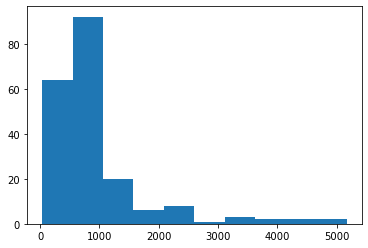

In [27]:
lens = [len(x) for x in lst_obs]
plt.hist(lens)

In [30]:
new_review = 'Am fost la un restarant la care am mancat susi'
new_review_tokens = review_to_tokens(new_review, w2i)
new_review_tokens

[57, 24, 4, 12, 0, 4, 10, 18, 257, 0]

In [31]:
tokens_to_review(new_review_tokens, i2w)

'Am fost la un UNK la care am mancat UNK'

(array([10., 24., 63., 47., 12.,  8.,  9.,  5.,  3.,  1.,  3.,  4.,  2.,
         0.,  0.,  0.,  3.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  2.]),
 array([  34. ,  239.2,  444.4,  649.6,  854.8, 1060. , 1265.2, 1470.4,
        1675.6, 1880.8, 2086. , 2291.2, 2496.4, 2701.6, 2906.8, 3112. ,
        3317.2, 3522.4, 3727.6, 3932.8, 4138. , 4343.2, 4548.4, 4753.6,
        4958.8, 5164. ]),
 <BarContainer object of 25 artists>)

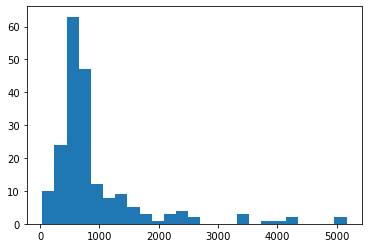

In [32]:
plt.hist(lens, bins=25)

In [35]:
X = [review_to_tokens(x, w2i) for x in reviews]
np.unique([len(x) for x in X])

array([1000])

In [36]:
np_X = np.array(X)
np_X.shape

(200, 1000)

In [43]:
np.set_printoptions(precision=5, suppress=True, linewidth=500)
np_X[:5, :15]

array([[ 2181,    26,  2751,    37,   244,    15,  1377,  4219,     1,  2420,  3573,    86,   127,     4,  1644],
       [ 1648,   200,    16,    12,    44,  6847,    57,   287,     4,  1545,     4,  5225,    78,  1648,   945],
       [ 6891,    11,   162,   196,     3,   895,  1999,   140,     1,     4,  3099,   819,    61,     1,     4],
       [  317,   118,  3629,     7,    30,   702,   245,  2207,    14,   312,  3117,   279, 10932,  1809,     3],
       [11154,  3150,  1677, 11155,   157,   915,   219,   955,    56,  5338,    14,    24,    32,     6, 11156]])

In [46]:
np_y = np_prices
np_y

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288, 266, 229, 133, 214, 109, 219, 147, 200, 170, 360, 258, 232, 133, 168, 206, 232, 133, 168, 206, 138, 138, 106, 181, 208, 120, 133, 186, 126, 149,  82, 130, 189, 114, 208, 184, 226, 118, 130, 155, 141, 128, 141, 387, 104, 106, 154, 155, 246, 154, 128, 102, 109, 114, 162, 194, 309, 176, 162, 224, 126, 104,  64, 114, 117, 130, 130, 149,  82, 107, 229, 253,  91, 187,  91, 251, 131, 142, 114, 138, 115, 109, 130, 115, 259, 115,  90, 136, 122,
       150, 144, 131, 138, 158, 114, 117, 114, 110, 131, 162, 106, 218, 101, 109, 144, 134, 149, 138, 130, 101, 115, 133,  96, 165, 120,  70,  88,  98, 101, 149,  94, 226, 163, 115,  94,  91,  82, 117,  99, 122, 163,  67, 123, 149, 134, 142,  96, 224,  96, 168, 136, 146, 128,  94, 126, 170, 139, 109, 123, 107, 115, 128, 104, 146, 197, 122, 150, 128, 106, 130, 131, 131,  85, 122, 117,  83,  86, 123, 109, 112, 112, 130, 109, 162, 126, 136, 120,  77, 107,  80, 107, 112, 117, 109, 122,  83, 115,
      

In [47]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X, np_y, test_size=0.2)

In [48]:
x_trn.shape

(160, 1000)

In [49]:
x_tst.shape

(40, 1000)

In [50]:
x_dev = x_tst[:20]
y_dev = y_tst[:20]
x_test = x_tst[20:]
y_test = x_tst[20:]
print(x_dev.shape)
print(x_test.shape)

(20, 1000)
(20, 1000)


In [56]:
tf_inp = tf.keras.layers.Input((1000,), name='inputs')
layer_emb = tf.keras.layers.Embedding(len(w2i), 10, name='embeds')
tf_emb = layer_emb(tf_inp)
tf_x = tf.keras.layers.Flatten()(tf_emb)
tf_x = tf.keras.layers.Dense(100)(tf_x)
tf_x = tf.keras.layers.Activation('relu')(tf_x)
tf_out = tf.keras.layers.Dense(1)(tf_x)
model = tf.keras.models.Model(tf_inp, tf_out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1000)]            0         
_________________________________________________________________
embeds (Embedding)           (None, 1000, 10)          220000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1000100   
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,220,201
Trainable params: 1,220,201
Non-trainable params: 0
____________________________________________

In [ ]:
model.fit